<a href="https://colab.research.google.com/github/a-brice/AI-and-Machine_Learning/blob/main/dl_image_classification/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-family:Fira Sans; font-size:3em"><i>Dataset exploration</i></h1>

Discovery and analysis of data provided

In [ ]:
#!rm -rf train test

## Necessary libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import os, time
from PIL import Image
import cv2
import random
import zipfile
import pathlib

## Data acquisition

In [ ]:
if not os.path.isdir('train') :
    from tensorflow.keras import utils

    file_train = utils.get_file("train.zip","https://storage.googleapis.com/gbl-ist-ve-hackathon-train/train.zip")
    with zipfile.ZipFile(file_train,'r') as f:
        f.extractall('train')

if not(os.path.isdir('test')):
    from tensorflow.keras import utils
    file_test = utils.get_file("test.zip","https://storage.googleapis.com/gbl-ist-ve-hackathon-test/test.zip")
    with zipfile.ZipFile(file_test,'r') as f:
        f.extractall('test')


## Data preparation

In [ ]:
pd.set_option('display.max_columns', None)


df = pd.read_csv('train/images.csv')

labels = df['label'].unique()
nb_images = len(os.listdir('train/images'))
df.index = range(1,len(df)+1)
df.head()


,image,station,label
1,1.jpg,unspecified,Podolampas
2,2.jpg,unspecified,detritus
3,3.jpg,unspecified,detritus
4,4.jpg,unspecified,Chaetoceros
5,5.jpg,unspecified,cyst


#### Number of images per label

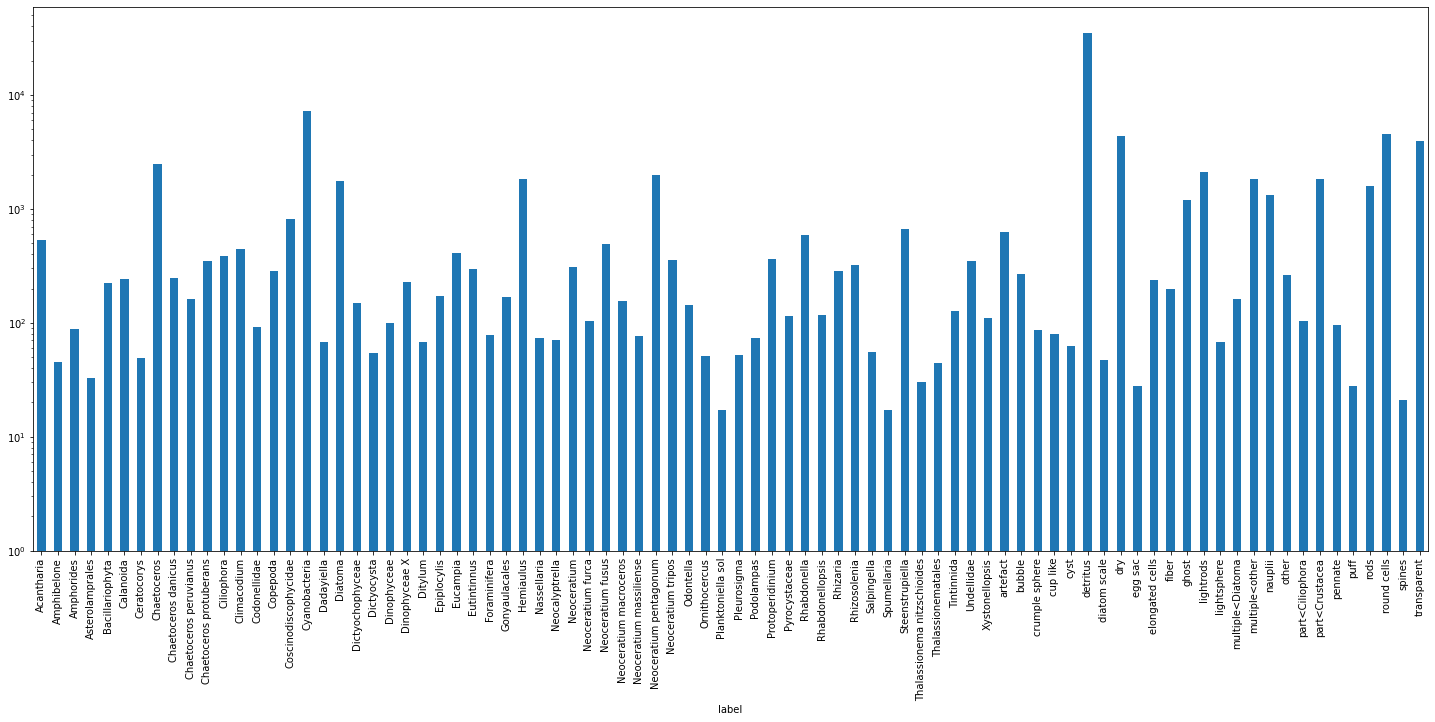

In [ ]:
df.groupby('label').count().image.plot.bar(figsize=(25,10), log=True)

In [ ]:
df.groupby('label').count().T.iloc[:1]

label,Acantharia,Amphibelone,Amphorides,Asterolamprales,Bacillariophyta,Calanoida,Ceratocorys,Chaetoceros,Chaetoceros danicus,Chaetoceros peruvianus,Chaetoceros protuberans,Ciliophora,Climacodium,Codonellidae,Copepoda,Coscinodiscophycidae,Cyanobacteria,Dadayiella,Diatoma,Dictyochophyceae,Dictyocysta,Dinophyceae,Dinophyceae X,Ditylum,Epiplocylis,Eucampia,Eutintinnus,Foraminifera,Gonyaulacales,Hemiaulus,Nassellaria,Neocalyptrella,Neoceratium,Neoceratium furca,Neoceratium fusus,Neoceratium macroceros,Neoceratium massiliense,Neoceratium pentagonum,Neoceratium tripos,Odontella,Ornithocercus,Planktoniella sol,Pleurosigma,Podolampas,Protoperidinium,Pyrocystaceae,Rhabdonella,Rhabdonellopsis,Rhizaria,Rhizosolenia,Salpingella,Spumellaria,Steenstrupiella,Thalassionema nitzschioides,Thalassionematales,Tintinnida,Undellidae,Xystonellopsis,artefact,bubble,crumple sphere,cup like,cyst,detritus,diatom scale,dry,egg sac,elongated cells,fiber,ghost,lightrods,lightsphere,multiple<Diatoma,multiple<other,nauplii,other,part<Ciliophora,part<Crustacea,pennate,puff,rods,round cells,spines,transparent
image,534,44,88,32,221,239,48,2457,246,160,347,384,447,90,285,821,7286,67,1764,149,53,98,227,67,172,410,296,77,166,1810,73,69,307,102,486,155,76,1985,352,143,50,16,51,72,363,114,590,115,284,320,55,16,659,29,43,125,348,110,623,266,86,78,62,34999,46,4351,27,238,198,1192,2113,67,161,1810,1313,261,102,1838,94,27,1572,4499,20,3940


#### Images sample

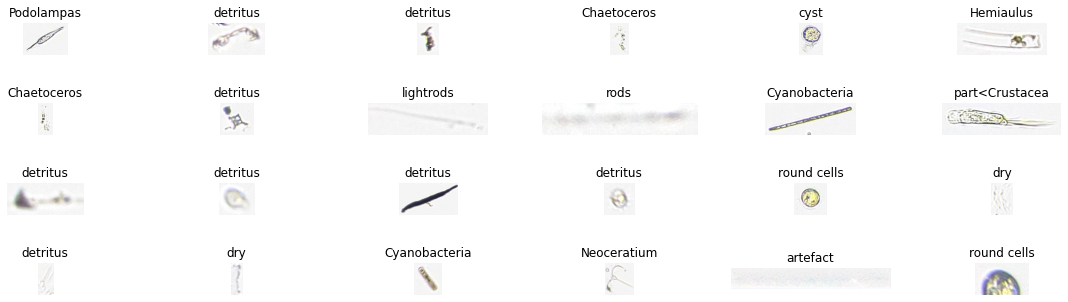

In [ ]:
paths = [f'train/images/{i}.jpg' for i in range(1,25)]
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=1.5)

for i, path in enumerate(paths):
    plt.subplot(4,6,i+1)
    plt.imshow(plt.imread(path))
    plt.axis('off')
    plt.title(df.label.loc[i+1])


## Data resizing

In [ ]:
#images = [plt.imread(f'train/images/{i}.jpg') for i in range(1,nb_images)]

#### shape images characteristics and resizing

In [ ]:
if not os.path.isdir("train/resized_images"): 
    
    os.makedirs("train/resized_images", exist_ok=True)
    stat_img = []
    inc = 0

    for i in range(1,nb_images):
        old_image = cv2.imread(f'train/images/{i}.jpg')
        stat_img.append(old_image.shape)

        if df.loc[i].label == 'detritus':
            inc+=1
        if inc > 10000 and df.loc[i].label == 'detritus':
            continue

        new_image = cv2.resize(old_image,(180,180))
        new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR) # gray scale
        cv2.imwrite(f'train/resized_images/{i}.jpg', new_image)

    df_img = pd.DataFrame(stat_img, columns=['height','width','color'], index=range(1,nb_images))
    print("Mean of shape images :", df_img.mean(), "Max of shape :", df_img.max(),"Min of shape :", df_img.min(), sep="\n\n")

#### Resized images sample

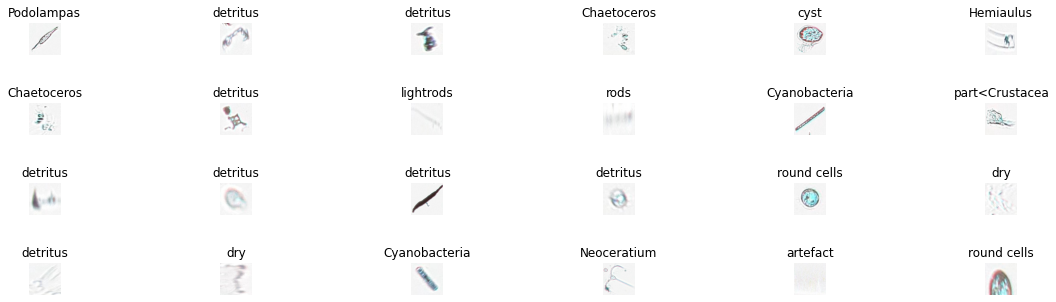

In [ ]:
paths = [f'train/resized_images/{i}.jpg' for i in range(1,25)]
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=1.5)

for i, path in enumerate(paths):
    plt.subplot(4,6,i+1)
    plt.imshow(plt.imread(path))
    plt.axis('off')
    plt.title(df.label.loc[i+1])

#### grayscale images

In [ ]:
# Suggestion 
#img = cv2.cvtColor(cv2.imread('train/images/1.jpg'), cv2.COLOR_RGB2BGR) # gray scale
#plt.imshow(img)

### Train data

In [ ]:
new_dataset = [i for i in range(1,nb_images)]
random.shuffle(new_dataset)
final_data = new_dataset[:3000]
new_dataset = new_dataset[3000:]

data_split = 0.2  # split in validation and train data 
train_data = new_dataset[ int(data_split*len(new_dataset)) : -1]
train_data = {k:df.label.loc[k] for k in train_data}


if not os.path.isdir("train/training_dataset"): 
    os.makedirs("train/training_dataset")
    
    for label in labels:
        os.makedirs("train/training_dataset/" + label.replace('<','-'))
        
    for img_name in train_data:
        img = cv2.imread(f"train/resized_images/{img_name}.jpg")
        if img is not None:
            cv2.imwrite(f"train/training_dataset/{train_data[img_name].replace('<','-')}/{img_name}.jpg", img)
    

### Validation data

In [ ]:
val_data = new_dataset[0 : int(data_split*len(new_dataset))]
val_data = {k:df.label.loc[k] for k in val_data}

if not os.path.isdir("train/validation_dataset"):
    os.makedirs("train/validation_dataset")
    
    for label in labels:
        os.makedirs("train/validation_dataset/" + label.replace('<','-'))
        
    for img_name in test_data:
        img = cv2.imread(f"train/resized_images/{img_name}.jpg")
        if img is not None:
            try:
                cv2.imwrite(f"train/validation_dataset/{val_data[img_name].replace('<','-')}/{img_name}.jpg", img)
            except:
                pass

<h1 style="font-family:Fira Sans; font-size:3em"><i>Model creation</i></h1>

Model which will serve to classify and predict data 

#### Deep learning librairies 

In [ ]:
from tensorflow.keras import layers, preprocessing
import tensorflow.keras
from tensorflow import losses
from tensorflow.data import Dataset

#### Data preprocessing

In [ ]:
path = pathlib.Path('train/training_dataset/')
img_width = 180
img_height = 180
batch = 32

train_ds = preprocessing.image_dataset_from_directory(path,
                                                      image_size=(img_height, img_width), 
                                                      batch_size=batch)

labels = train_ds.class_names


path = pathlib.Path('train/validation_dataset/')
val_ds = preprocessing.image_dataset_from_directory(path,
                                                      image_size=(img_height, img_width), 
                                                      batch_size=batch)


Found 47268 files belonging to 84 classes.
Found 1955 files belonging to 84 classes.


In [ ]:
#d = dict()
#for label in labels:
#    d[label] = glob.glob(f'train/training_dataset/{label}/*.jpg')
#for ditem in d:
#    print(ditem, ':', len(d[ditem]))

#### Neural network

In [ ]:
cnn_layers = [
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(labels), activation='softmax')
]

model = tensorflow.keras.Sequential(cnn_layers)

In [ ]:
model.compile(optimizer='adam', loss= losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1478/1478 [==============================] - 60s 40ms/step - loss: 2.4771 - accuracy: 0.3521 - val_loss: 1.9644 - val_accuracy: 0.4593
Epoch 2/10
1478/1478 [==============================] - 59s 40ms/step - loss: 1.8787 - accuracy: 0.4808 - val_loss: 1.6644 - val_accuracy: 0.5284
Epoch 3/10
1478/1478 [==============================] - 57s 39ms/step - loss: 1.5994 - accuracy: 0.5451 - val_loss: 1.5892 - val_accuracy: 0.5437
Epoch 4/10
1478/1478 [==============================] - 57s 39ms/step - loss: 1.3880 - accuracy: 0.5950 - val_loss: 1.5472 - val_accuracy: 0.5606
Epoch 5/10
1478/1478 [==============================] - 57s 39ms/step - loss: 1.2272 - accuracy: 0.6332 - val_loss: 1.6226 - val_accuracy: 0.5550
Epoch 6/10
1478/1478 [==============================] - 58s 39ms/step - loss: 1.0663 - accuracy: 0.6736 - val_loss: 1.7551 - val_accuracy: 0.5611
Epoch 7/10
1478/1478 [==============================] - 57s 39ms/step - loss: 0.9232 - accuracy: 0.7126 - val_loss: 2.0385 - val_accura

#### Using model for prediction

In [ ]:
prevision = []
for img_name in final_data:
    if os.path.isfile(f'train/resized_images/{img_name}.jpg'):
        predictions = model.predict(np.expand_dims(plt.imread(f'train/resized_images/{img_name}.jpg'), axis=0))
        prediction = np.argmax(predictions)
        prevision.append([f'{img_name}.jpg', labels[prediction], df.loc[img_name].label])

prevision = pd.DataFrame(prevision, columns=['image name', 'real label', 'prediction'])
print(list(prevision['real label'] == prevision['prediction']).count(True), 'correct values !')
prevision

1474 correct values !


,image name,real label,prediction
0,49409.jpg,Eutintinnus,dry
1,12816.jpg,detritus,detritus
2,75180.jpg,bubble,bubble
3,24624.jpg,Acantharia,Acantharia
4,50806.jpg,round cells,round cells
...,...,...,...
2116,75868.jpg,Chaetoceros protuberans,Chaetoceros protuberans
2117,15707.jpg,Cyanobacteria,Cyanobacteria
2118,4553.jpg,multiple-other,multiple<other
2119,28007.jpg,round cells,round cells


## Test data prediction

In [ ]:
df_name_img = pd.read_csv('test/images.csv')

Resizing picture

In [ ]:
#!rm -rf test/resized_images

In [ ]:
if not os.path.isdir("test/resized_images"): 
    
    os.makedirs("test/resized_images", exist_ok=True)

    for img_name in df_name_img['image']:
        old_image = cv2.imread(f'test/images/{img_name}')
        if img_name is not None:
            new_image = cv2.resize(old_image,(180,180))
            new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR) # gray scale
            cv2.imwrite(f'test/resized_images/{img_name}', new_image)


In [ ]:
df_test = []
for img_name in df_name_img['image']:
    if os.path.isfile(f'test/images/{img_name}'):
        predictions = model.predict(np.expand_dims(plt.imread(f'test/resized_images/{img_name}'), axis=0))
        df_test.append([img_name] + list(predictions[0]))
df_test = pd.DataFrame(df_test, columns=['image'] + [l.replace('-','<') for l in labels])

In [ ]:
df_test.to_csv('submission_template.csv')

#### Model improving

In [ ]:
#path = "train/training_dataset/{label}/*.jpg"

cnn_layers = [
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1,activation='softmax')
]

model_clean = tensorflow.keras.Sequential(cnn_layers)
model_clean.compile()

train_datagen = preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

path = 'train/training_dataset/'

train_ds_spe = train_datagen.flow_from_directory(path,
                                            target_size=(img_height, img_width), 
                                            batch_size=batch)



model_clean.fit(train_ds,epochs=5,validation_data=train_ds)


    

## Save model

In [ ]:
model.save('plankthon_model.h5')

## Load model

In [ ]:
model_loaded = tensorflow.keras.models.load_model('plankthon_model.h5')
model_loaded.summary()